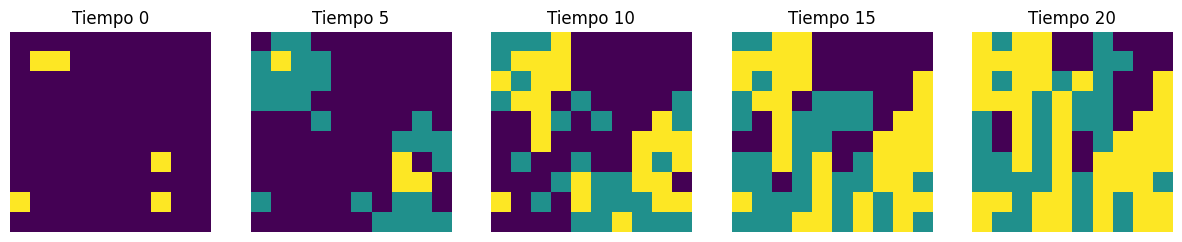

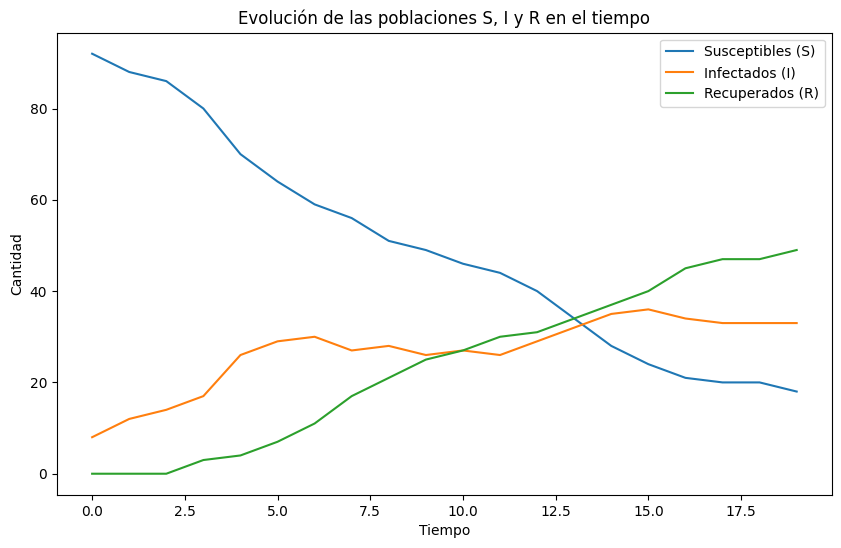

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Inicializar grid
def inicializar_grid(M, N, I0):
    grid = np.zeros((M, N), dtype=int)
    infectadas = random.sample([(i, j) for i in range(M) for j in range(N)], I0)
    for i, j in infectadas:
        grid[i, j] = 1
    return grid

# Obtener vecindad
def obtener_vecindad(grid, i, j, rad):
    M, N = grid.shape
    vecinos = []
    for x in range(max(0, i - rad), min(M, i + rad + 1)):
        for y in range(max(0, j - rad), min(N, j + rad + 1)):
            if (x, y) != (i, j):
                vecinos.append(grid[x, y])
    return vecinos

# Simulación del modelo SIR
def simular_SIR(M, N, T, I0, rad, beta, gamma):
    grid = inicializar_grid(M, N, I0)
    historial_grids = [grid.copy()]
    historial_SIR = []

    for t in range(T):
        nuevo_grid = grid.copy()
        S, I, R = 0, 0, 0

        for i in range(M):
            for j in range(N):
                estado_actual = grid[i, j]
                vecinos = obtener_vecindad(grid, i, j, rad)

                if estado_actual == 0:  # Contagio
                    infectados_vecinos = vecinos.count(1)
                    prob_infeccion = beta * infectados_vecinos / len(vecinos)
                    if random.random() < prob_infeccion:
                        nuevo_grid[i, j] = 1
                
                elif estado_actual == 1:  # Recuperación
                    if random.random() < gamma:
                        nuevo_grid[i, j] = 2

                # Contadores
                if nuevo_grid[i, j] == 0:
                    S += 1
                elif nuevo_grid[i, j] == 1:
                    I += 1
                elif nuevo_grid[i, j] == 2:
                    R += 1

        historial_grids.append(nuevo_grid.copy())
        historial_SIR.append((S, I, R))
        grid = nuevo_grid

    return historial_grids, historial_SIR

# Parámetros de ejemplo
M, N = 10, 10  # Tamaño del grid
T = 20         # Tiempo de simulación
I0 = 5         # Número inicial de infectados
rad = 1        # Radio de interacción
beta = 0.5     # Probabilidad de infección
gamma = 0.1    # Probabilidad de recuperación


# Ejecutar simulación
historial_grids, historial_SIR = simular_SIR(M, N, T, I0, rad, beta, gamma)

# Graficar evolución del grid
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
time_points = [0, 5, 10, 15, 20]  # Puntos de tiempo dentro del rango de la simulación

for ax, t in zip(axes, time_points):
    ax.imshow(historial_grids[t], cmap='viridis')
    ax.set_title(f'Tiempo {t}')
    ax.axis('off')

plt.show()


# Graficar la cantidad de S, I y R en el tiempo
S_values, I_values, R_values = zip(*historial_SIR)

plt.figure(figsize=(10, 6))
plt.plot(S_values, label='Susceptibles (S)')
plt.plot(I_values, label='Infectados (I)')
plt.plot(R_values, label='Recuperados (R)')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.legend()
plt.title('Evolución de las poblaciones S, I y R en el tiempo')
plt.show()


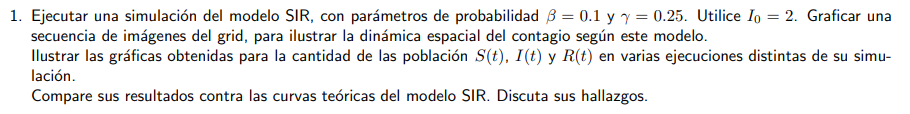

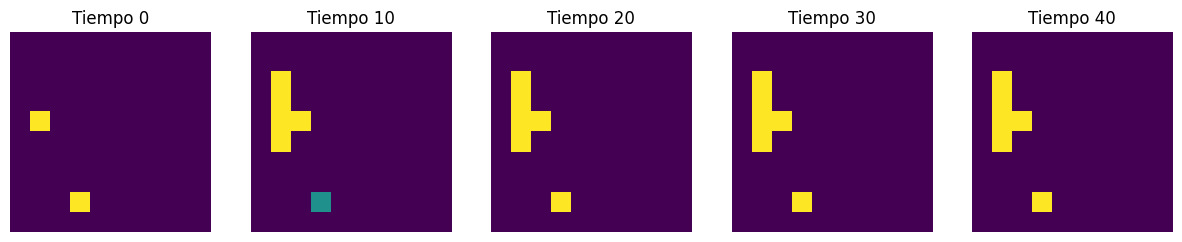

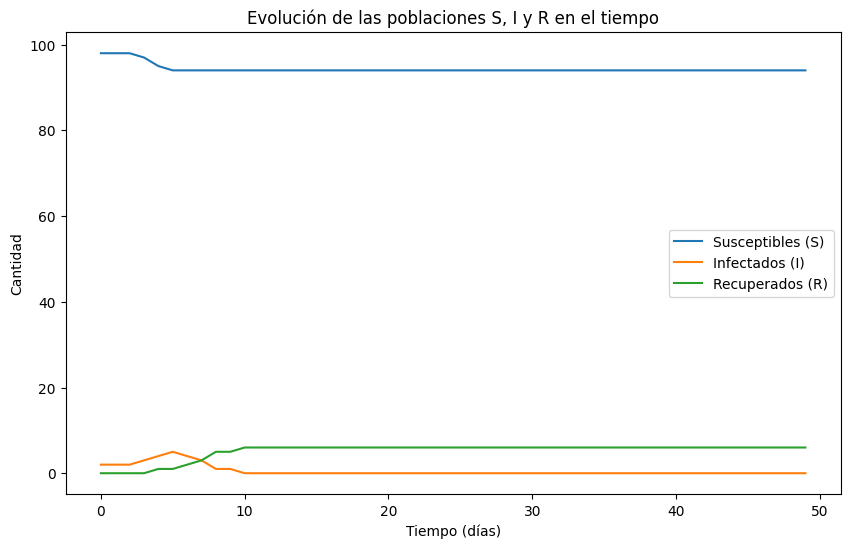

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Inicializar grid
def inicializar_grid(M, N, I0):
    grid = np.zeros((M, N), dtype=int)
    infectadas = random.sample([(i, j) for i in range(M) for j in range(N)], I0)
    for i, j in infectadas:
        grid[i, j] = 1
    return grid

# Obtener vecindad
def obtener_vecindad(grid, i, j, rad):
    M, N = grid.shape
    vecinos = []
    for x in range(max(0, i - rad), min(M, i + rad + 1)):
        for y in range(max(0, j - rad), min(N, j + rad + 1)):
            if (x, y) != (i, j):
                vecinos.append(grid[x, y])
    return vecinos

# Simulación del modelo SIR
def simular_SIR(M, N, T, I0, rad, beta, gamma):
    grid = inicializar_grid(M, N, I0)
    historial_grids = [grid.copy()]
    historial_SIR = []

    for t in range(T):
        nuevo_grid = grid.copy()
        S, I, R = 0, 0, 0

        for i in range(M):
            for j in range(N):
                estado_actual = grid[i, j]
                vecinos = obtener_vecindad(grid, i, j, rad)

                if estado_actual == 0:  # Contagio
                    infectados_vecinos = vecinos.count(1)
                    prob_infeccion = beta * infectados_vecinos / len(vecinos)
                    if random.random() < prob_infeccion:
                        nuevo_grid[i, j] = 1
                
                elif estado_actual == 1:  # Recuperación
                    if random.random() < gamma:
                        nuevo_grid[i, j] = 2

                # Contadores
                if nuevo_grid[i, j] == 0:
                    S += 1
                elif nuevo_grid[i, j] == 1:
                    I += 1
                elif nuevo_grid[i, j] == 2:
                    R += 1

        historial_grids.append(nuevo_grid.copy())
        historial_SIR.append((S, I, R))
        grid = nuevo_grid

    return historial_grids, historial_SIR

# Parámetros para la simulación
M, N = 10, 10  # Tamaño del grid
T = 50         # Tiempo de simulación (días)
I0 = 2         # Número inicial de infectados
rad = 1        # Radio de interacción
beta = 0.1     # Probabilidad de infección
gamma = 0.25   # Probabilidad de recuperación

# Ejecutar simulación
historial_grids, historial_SIR = simular_SIR(M, N, T, I0, rad, beta, gamma)

# Graficar evolución del grid
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
time_points = [0, 10, 20, 30, 40, 49]  # Puntos de tiempo dentro del rango de la simulación

for ax, t in zip(axes, time_points):
    ax.imshow(historial_grids[t], cmap='viridis')
    ax.set_title(f'Tiempo {t}')
    ax.axis('off')

plt.show()

# Graficar la cantidad de S, I y R en el tiempo
S_values, I_values, R_values = zip(*historial_SIR)

plt.figure(figsize=(10, 6))
plt.plot(S_values, label='Susceptibles (S)')
plt.plot(I_values, label='Infectados (I)')
plt.plot(R_values, label='Recuperados (R)')
plt.xlabel('Tiempo (días)')
plt.ylabel('Cantidad')
plt.legend()
plt.title('Evolución de las poblaciones S, I y R en el tiempo')
plt.show()


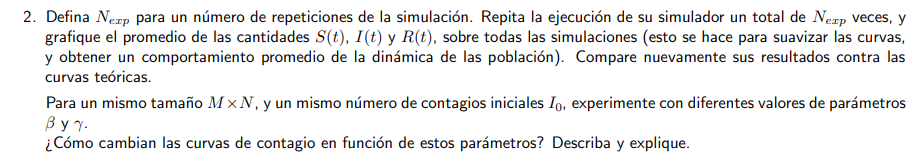

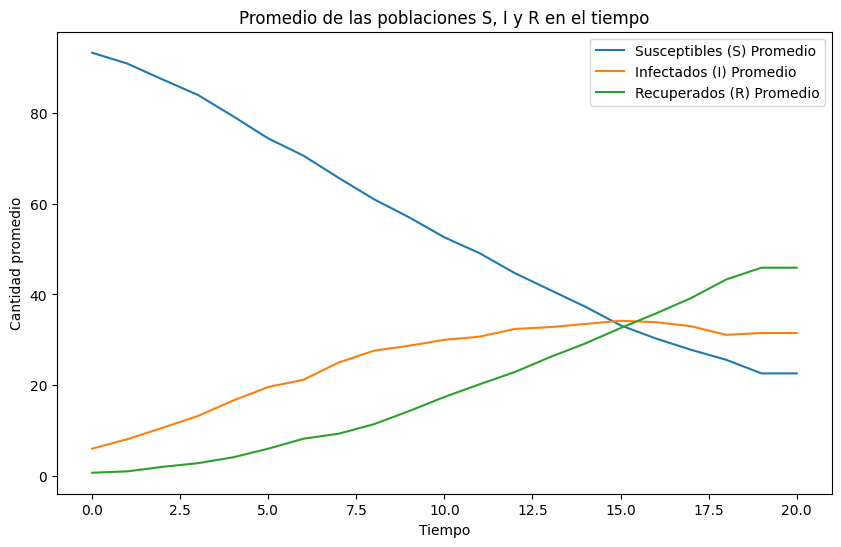

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Inicializar grid
def inicializar_grid(M, N, I0):
    grid = np.zeros((M, N), dtype=int)
    infectadas = random.sample([(i, j) for i in range(M) for j in range(N)], I0)
    for i, j in infectadas:
        grid[i, j] = 1
    return grid

# Obtener vecindad
def obtener_vecindad(grid, i, j, rad):
    M, N = grid.shape
    vecinos = []
    for x in range(max(0, i - rad), min(M, i + rad + 1)):
        for y in range(max(0, j - rad), min(N, j + rad + 1)):
            if (x, y) != (i, j):
                vecinos.append(grid[x, y])
    return vecinos

# Simulación del modelo SIR
def simular_SIR(M, N, T, I0, rad, beta, gamma):
    grid = inicializar_grid(M, N, I0)
    historial_grids = [grid.copy()]
    historial_SIR = []

    for t in range(T):
        nuevo_grid = grid.copy()
        S, I, R = 0, 0, 0

        for i in range(M):
            for j in range(N):
                estado_actual = grid[i, j]
                vecinos = obtener_vecindad(grid, i, j, rad)

                if estado_actual == 0:  # Contagio
                    infectados_vecinos = vecinos.count(1)
                    prob_infeccion = beta * infectados_vecinos / len(vecinos)
                    if random.random() < prob_infeccion:
                        nuevo_grid[i, j] = 1
                
                elif estado_actual == 1:  # Recuperación
                    if random.random() < gamma:
                        nuevo_grid[i, j] = 2

                # Contadores
                if nuevo_grid[i, j] == 0:
                    S += 1
                elif nuevo_grid[i, j] == 1:
                    I += 1
                elif nuevo_grid[i, j] == 2:
                    R += 1

        historial_grids.append(nuevo_grid.copy())
        historial_SIR.append((S, I, R))
        grid = nuevo_grid

    # Aseguramos que historial_SIR tenga exactamente T+1 pasos
    while len(historial_SIR) < T + 1:
        historial_SIR.append(historial_SIR[-1])

    return historial_grids, historial_SIR

# Promediar simulaciones
def promediar_simulaciones(Nexp, M, N, T, I0, rad, beta, gamma):
    S_totales = np.zeros(T + 1)
    I_totales = np.zeros(T + 1)
    R_totales = np.zeros(T + 1)

    for _ in range(Nexp):
        _, historial_SIR = simular_SIR(M, N, T, I0, rad, beta, gamma)
        S_values, I_values, R_values = zip(*historial_SIR)

        S_totales += np.array(S_values)
        I_totales += np.array(I_values)
        R_totales += np.array(R_values)

    # Promediar sobre las simulaciones
    S_promedio = S_totales / Nexp
    I_promedio = I_totales / Nexp
    R_promedio = R_totales / Nexp

    return S_promedio, I_promedio, R_promedio


# Parámetros de ejemplo
M, N = 10, 10  # Tamaño del grid
T = 20         # Tiempo de simulación
I0 = 5         # Número inicial de infectados
rad = 1        # Radio de interacción
beta = 0.5     # Probabilidad de infección
gamma = 0.1    # Probabilidad de recuperación

# Ejecutar simulación múltiples veces y obtener promedios
S_promedio, I_promedio, R_promedio = promediar_simulaciones(Nexp, M, N, T, I0, rad, beta, gamma)

# Graficar la cantidad promedio de S, I y R en el tiempo
plt.figure(figsize=(10, 6))
plt.plot(S_promedio, label='Susceptibles (S) Promedio')
plt.plot(I_promedio, label='Infectados (I) Promedio')
plt.plot(R_promedio, label='Recuperados (R) Promedio')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad promedio')
plt.legend()
plt.title('Promedio de las poblaciones S, I y R en el tiempo')
plt.show()
